# Nivell 1




- Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('DelayedFlights.csv')

In [3]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
#elimino la columna contador de filas Unnamed: 0
df = df.drop('Unnamed: 0', 1)

In [6]:
df.describe().round(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.000,1936758.000,1936758.000,1936758.000,1936758.000,1929648.000,1936758.000,1936758.000,1928371.000,1936560.000,1928371.000,1928371.000,1936758.000,1936758.000,1929648.000,1936303.000,1936758.000,1936758.000,1247488.000,1247488.000,1247488.000,1247488.000,1247488.000
mean,2008.0,6.111,15.753,3.985,1518.534,1467.473,1610.141,1634.225,2184.263,133.306,134.303,108.277,42.200,43.185,765.686,6.813,18.232,0.000,0.004,19.179,3.704,15.022,0.090,25.296
std,0.0,3.483,8.776,1.996,450.485,424.767,548.178,464.635,1944.702,72.060,71.341,68.643,56.785,53.403,574.480,5.274,14.339,0.018,0.063,43.546,21.493,33.833,2.023,42.055
min,2008.0,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,14.000,-25.000,0.000,-109.000,6.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2008.0,3.000,8.000,2.000,1203.000,1135.000,1316.000,1325.000,610.000,80.000,82.000,58.000,9.000,12.000,338.000,4.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2008.0,6.000,16.000,4.000,1545.000,1510.000,1715.000,1705.000,1543.000,116.000,116.000,90.000,24.000,24.000,606.000,6.000,14.000,0.000,0.000,2.000,0.000,2.000,0.000,8.000
75%,2008.0,9.000,23.000,6.000,1900.000,1815.000,2030.000,2014.000,3422.000,165.000,165.000,137.000,56.000,53.000,998.000,8.000,21.000,0.000,0.000,21.000,0.000,15.000,0.000,33.000
max,2008.0,12.000,31.000,7.000,2400.000,2359.000,2400.000,2400.000,9742.000,1114.000,660.000,1091.000,2461.000,2467.000,4962.000,240.000,422.000,1.000,1.000,2436.000,1352.000,1357.000,392.000,1316.000


In [7]:
#Limpieza de los datos

In [8]:
df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [9]:
#Elimino las filas que tienen null en alguna columna

In [10]:
dflimpio = df.dropna(axis=0, how='any')
dflimpio.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Voy a usar la varialbe DepDelay para predicir ArrDelay

1 Regresion lineal

In [11]:
target_column = ['ArrDelay']

In [12]:
predictors=['DepDelay']

In [13]:
y = pd.DataFrame(dflimpio, columns=target_column)

In [14]:
X=pd.DataFrame(dflimpio, columns=predictors)

In [15]:
#divido DFs en trainset y test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [17]:
X_train

,DepDelay
901067,7.0
932903,65.0
654628,55.0
505993,30.0
1131821,25.0
...,...
166340,23.0
389778,133.0
202316,30.0
1029145,24.0


In [18]:
#predictors = list(set(list(dflimpio.columns))-set(target_column))

In [19]:
predictors

['DepDelay']

In [20]:
#y = pd.DataFrame(dflimpio, columns=target_column)

In [103]:
#X=pd.DataFrame(dflimpio, columns=predictors)

In [22]:
X.head()

,DepDelay
3,34.0
5,67.0
7,94.0
9,27.0
11,28.0


In [23]:
y.head()

,ArrDelay
3,34.0
5,57.0
7,80.0
9,15.0
11,16.0


In [24]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

𝑅²

In [25]:
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9025416348925841


Lasso Regression

In [26]:
model_lasso = Lasso(alpha=0.01)

In [27]:
model_lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [28]:
pred_train_lasso= model_lasso.predict(X_train)

In [29]:
print(f'𝑅²= {r2_score(y_train, pred_train_lasso)}')

𝑅²= 0.9033953348975828


Random Forest

In [30]:
moderlRandomForest = RandomForestRegressor(n_estimators=50, random_state=8)

In [31]:
moderlRandomForest.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=50, random_state=8)

In [32]:
model_rf = moderlRandomForest.fit(X_train, y_train.values.ravel())

DecisionTreeRegressor

In [33]:
dtr1 = DecisionTreeRegressor(max_depth=2,random_state=1)

In [34]:
clf=dtr1.fit(X_train, y_train)

In [35]:
r_sqDT = dtr1.score(X_test, y_test)
print('coefficient of determination:', r_sqDT)

coefficient of determination: 0.7651764317887705


[Text(279.0, 453.0, 'X[0] <= 110.5\nmse = 3695.32\nsamples = 835815\nvalue = 63.282'),
 Text(139.5, 271.8, 'X[0] <= 56.5\nmse = 808.67\nsamples = 726239\nvalue = 45.969'),
 Text(69.75, 90.59999999999997, 'mse = 349.618\nsamples = 534886\nvalue = 34.243'),
 Text(209.25, 90.59999999999997, 'mse = 633.122\nsamples = 191353\nvalue = 78.747'),
 Text(418.5, 271.8, 'X[0] <= 254.5\nmse = 7673.812\nsamples = 109576\nvalue = 178.029'),
 Text(348.75, 90.59999999999997, 'mse = 1792.821\nsamples = 97783\nvalue = 156.67'),
 Text(488.25, 90.59999999999997, 'mse = 21289.272\nsamples = 11793\nvalue = 355.13')]

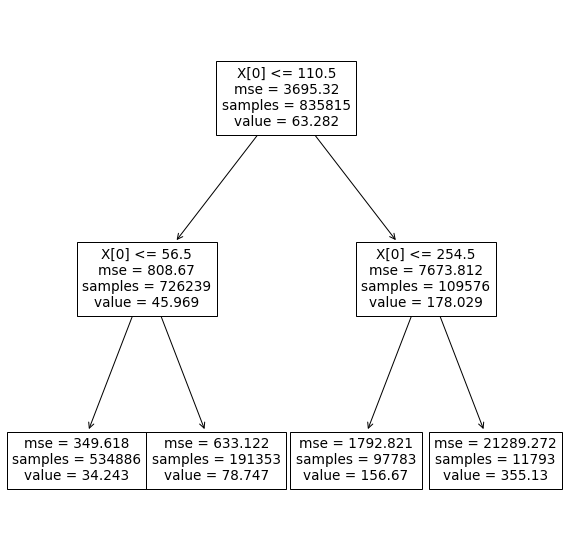

In [36]:
plt.figure(figsize=(10,10))

tree.plot_tree(clf) 


# Exercici 2
Compara’ls en base al MSE i al R2 .

In [37]:
#funcion que calcula MSE y R2
def mser2(regresiones):
    for model in regresiones:
        model.fit(X,y)
        y_pred = model.predict(X)
        mse = mean_squared_error(y,y_pred)
        R2 = r2_score(y,y_pred) 
        print(f'Modelo: MSE: {mse} {model} R2: {R2}')
        
regresiones = [lm,model_lasso,dtr1,moderlRandomForest]
mser2(regresiones)

Modelo: MSE: 357.60697789082235 LinearRegression() R2: 0.90311433875909
Modelo: MSE: 357.606977918722 Lasso(alpha=0.01) R2: 0.9031143387515311
Modelo: MSE: 874.0720850488748 DecisionTreeRegressor(max_depth=2, random_state=1) R2: 0.7631895987274734


<ipython-input-37-097c265b3313>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


Modelo: MSE: 332.3554023803966 RandomForestRegressor(n_estimators=50, random_state=8) R2: 0.9099556918141449


# Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [39]:
#Regresion lineal 

In [40]:
#Pongo fit_intercept

In [41]:
lmt = linear_model.LinearRegression(fit_intercept=True)
modellf = lmt.fit(X_train,y_train)

In [42]:
# Pongo fit_intercept y normalizacion

In [43]:
lmtn = linear_model.LinearRegression(fit_intercept=True,normalize=True)
modellfn = lmt.fit(X_train,y_train)

In [44]:
#DecisionTreeRegressor

In [45]:
dtr2 = DecisionTreeRegressor(max_depth=15,random_state=1)

In [46]:
dtr3 = DecisionTreeRegressor(max_depth=15,random_state=1,min_samples_leaf=3)

In [47]:
#RandomForest n_estimatorsint cambio el  numero de arboles en el bosque 

In [48]:
moderlRandomForest2 = RandomForestRegressor(n_estimators=100, random_state=8)

In [49]:
moderlRandomForest3 = RandomForestRegressor(n_estimators=150, random_state=8, max_depth=9)

# Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

In [50]:
regresiones = [moderlRandomForest,moderlRandomForest2,moderlRandomForest3]
mser2(regresiones)

<ipython-input-37-097c265b3313>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


Modelo: MSE: 332.3554023803966 RandomForestRegressor(n_estimators=50, random_state=8) R2: 0.9099556918141449


<ipython-input-37-097c265b3313>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


Modelo: MSE: 332.35025136068157 RandomForestRegressor(random_state=8) R2: 0.9099570873684323


<ipython-input-37-097c265b3313>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


Modelo: MSE: 332.5029626314485 RandomForestRegressor(max_depth=9, n_estimators=150, random_state=8) R2: 0.9099157136443107


In [51]:
regresiones = [dtr1,dtr2,dtr3]
mser2(regresiones)

Modelo: MSE: 874.0720850488748 DecisionTreeRegressor(max_depth=2, random_state=1) R2: 0.7631895987274734
Modelo: MSE: 332.3039030712794 DecisionTreeRegressor(max_depth=15, random_state=1) R2: 0.9099696444071472
Modelo: MSE: 332.55149988572725 DecisionTreeRegressor(max_depth=15, min_samples_leaf=3, random_state=1) R2: 0.9099025635542219


In [52]:
regresiones = [lm,modellf,modellfn]
mser2(regresiones)

Modelo: MSE: 357.60697789082235 LinearRegression() R2: 0.90311433875909
Modelo: MSE: 357.60697789082235 LinearRegression() R2: 0.90311433875909
Modelo: MSE: 357.60697789082235 LinearRegression() R2: 0.90311433875909


# Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

<AxesSubplot:>

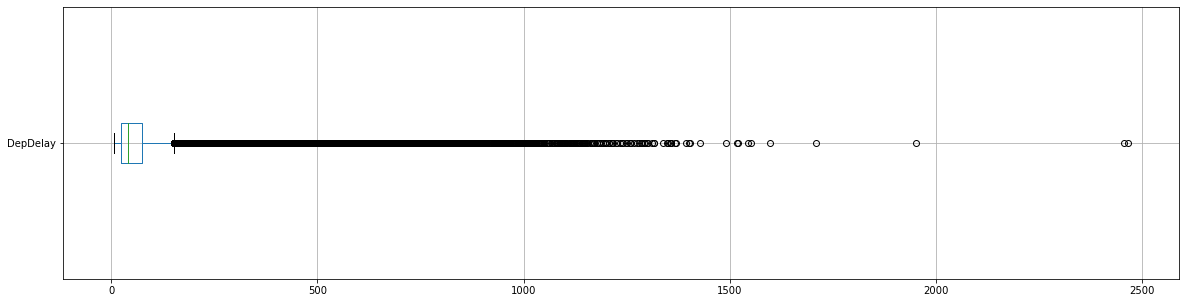

In [53]:
X.boxplot(vert=False,figsize=(20,5))

<AxesSubplot:>

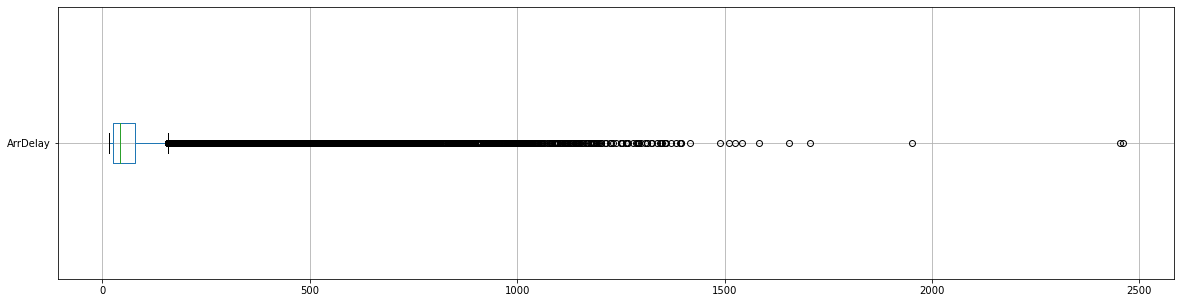

In [54]:
y.boxplot(vert=False,figsize=(20,5))

array([[<AxesSubplot:title={'center':'ArrDelay'}>]], dtype=object)

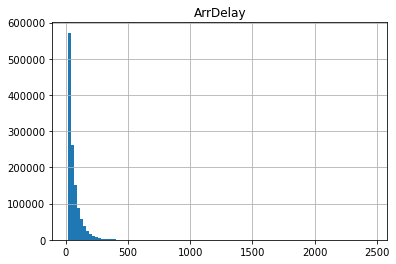

In [55]:
y.hist( bins=100)

array([[<AxesSubplot:title={'center':'DepDelay'}>]], dtype=object)

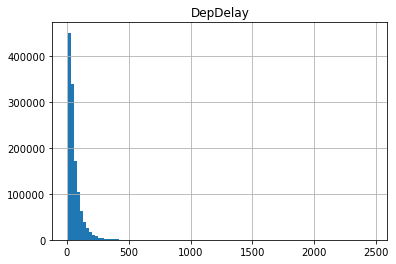

In [56]:
X.hist( bins=100)

<bound method Axes.barh of <AxesSubplot:>>

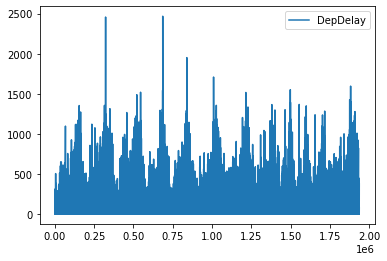

In [57]:
X.plot().barh

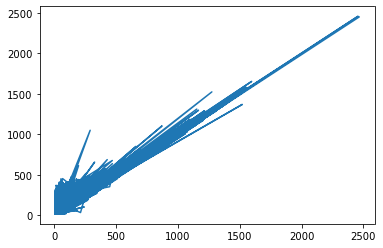

In [58]:
plt.plot(X,y)

In [59]:
#x_=np.array(X).reshape((-1, 1))

In [60]:
type(X)

pandas.core.frame.DataFrame

In [61]:
X.columns

Index(['DepDelay'], dtype='object')

In [62]:
Q1 = y['ArrDelay'].quantile(0.25)
Q3 = y['ArrDelay'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (y['ArrDelay'] >= Q1 - 1.5 * IQR) & (y['ArrDelay'] <= Q3 + 1.5 *IQR)
y_sinoutlayer=y.loc[filter]  

<AxesSubplot:>

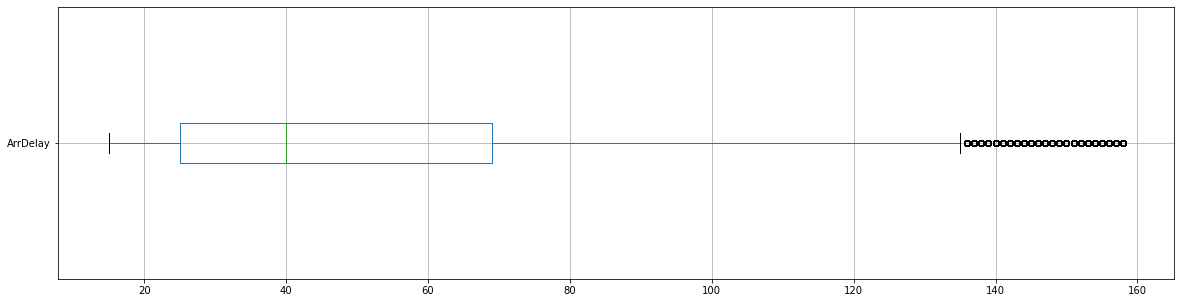

In [63]:
y_sinoutlayer.boxplot(vert=False,figsize=(20,5))

In [70]:
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
Q1=df.quantile(0.25)
Q2=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)
df_sol = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Year                -1929.0
Month                  76.0
DayofMonth             71.0
DayOfWeek              77.0
DepTime             -1124.0
CRSDepTime          -1056.0
ArrTime             -1237.0
CRSArrTime          -1246.0
FlightNum            -531.0
ActualElapsedTime      -1.0
CRSElapsedTime         -3.0
AirTime                21.0
ArrDelay               70.0
DepDelay               67.0
Distance             -259.0
TaxiIn                 75.0
TaxiOut                69.0
Cancelled              79.0
Diverted               79.0
CarrierDelay           79.0
WeatherDelay           79.0
NASDelay               79.0
SecurityDelay          79.0
LateAircraftDelay      79.0
Name: 0.25, dtype: float64


<ipython-input-70-5f870d4615cc>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_sol = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-70-5f870d4615cc>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_sol = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [73]:
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

Year                    0.0
Month                   6.0
DayofMonth             15.0
DayOfWeek               4.0
DepTime               697.0
CRSDepTime            680.0
ArrTime               714.0
CRSArrTime            689.0
FlightNum            2812.0
ActualElapsedTime      85.0
CRSElapsedTime         83.0
AirTime                79.0
ArrDelay               47.0
DepDelay               41.0
Distance              660.0
TaxiIn                  4.0
TaxiOut                11.0
Cancelled               0.0
Diverted                0.0
CarrierDelay           21.0
WeatherDelay            0.0
NASDelay               15.0
SecurityDelay           0.0
LateAircraftDelay      33.0
dtype: float64


In [74]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_out.shape)

<ipython-input-74-dcd1fa6746c0>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-74-dcd1fa6746c0>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(1251298, 29)


In [83]:
standsc = StandardScaler()
y = pd.DataFrame(df_out, columns=target_column)
X = pd.DataFrame(df_out, columns=predictors)
y = standsc.fit_transform(y)
X = standsc.fit_transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=358)

In [85]:
lm = linear_model.LinearRegression()

model2 = lm.fit(X_train,y_train)

regresiones = [model,model2]
mser2(regresiones)

Modelo: MSE: 0.24691218341200638 LinearRegression() R2: 0.7530878165879937
Modelo: MSE: 0.24691218341200638 LinearRegression() R2: 0.7530878165879937


In [88]:
lm = linear_model.LinearRegression()

model2 = lm.fit(X_train,y_train)

regresiones = [model2]
mser2(regresiones)

Modelo: MSE: 0.24691218341200638 LinearRegression() R2: 0.7530878165879937


In [ ]:
## Como se puede observar los valores de MSE Y R2 han bajado
# Modelo: MSE: 357.60697789082235 LinearRegression() R2: 0.90311433875909 sin tratar variables
#Modelo: MSE: 0.24691218341200638 LinearRegression() R2: 0.7530878165879937 tratando variables


# Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [92]:
# Voy a usar las variables que tienen delay para predicir delay sin usar depdelay
#el rertaso total se compone de los retrasos parciales

In [93]:
pd.set_option('display.max_columns', None)

In [94]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [135]:
df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dftotal                   0
dtype: int64

In [136]:
dflimpio2=df.dropna(axis=0, how='any')
dflimpio.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [137]:
df['dftotal']=df['CarrierDelay']+df['WeatherDelay']+df['NASDelay']+df['SecurityDelay']+df['LateAircraftDelay']

In [148]:
target_column1 = ['ArrDelay']
predictors1=['dftotal']
y2 = pd.DataFrame(dflimpio2, columns=target_column1)
X2 = pd.DataFrame(dflimpio2, columns=predictors1)

In [149]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [151]:
lm2= linear_model.LinearRegression()
model3 = lm.fit(X_train2,y_train2)

In [152]:
regresiones = [model3]
mser2(regresiones)

Modelo: MSE: 0.24691218341200638 LinearRegression() R2: 0.7530878165879937
